result2 1.0000000000000002
result3 0.13114793731323005
result a-b 0.09999999999999998
result b-c 0.9000000000000001
result a-c 0.9999999957547261


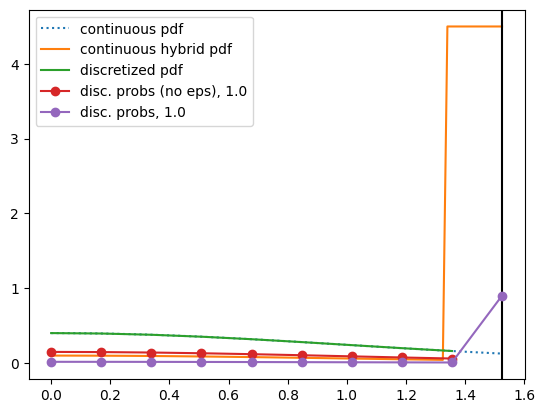

In [393]:
import numpy as np
from scipy.stats import truncnorm,uniform,norm
import matplotlib.pyplot as plt


def obtain_probability(self,t):

    U = np.sqrt( self.alpha  * np.log(t) ) 
    epsilon = 10e-7
    sigma = 1

    if np.random.uniform([0,1]) < epsilon:
        Z = U
    else:
        obj = truncnorm( a , b , loc=mu, scale=sigma).rvs(a, b, size=1000)
        Z = truncnorm( (0 - loc) / scale , (U - loc) / scale , loc=0, scale=sigma).rvs() 

    return Z


def obtain_probability(self,t):

    U = np.sqrt( self.alpha  * np.log(t) ) 
    epsilon = 10e-7
    sigma = 1
    
    rhos = list( np.arange(0, U, U / (K-1) ) )
    p_m_hat =  np.array( [ 1/np.sqrt(2*np.pi )*np.exp( -(rho**2) / (2*sigma**2)  ) for rho in rhos ] )
    rhos.append(U)

    p_m = (1 - epsilon) * p_m_hat / p_m_hat.sum()
    p_m = p_m.tolist()
    p_m.append(epsilon)

    Z = np.random.choice(rhos, p= p_m)

    return Z

# Set the mean and standard deviation of the Gaussian distribution

scale = 1
loc = 0

epsilon = 0.9
tho = 0.2

alpha = 1.01
t = 10
K = 10
U = np.sqrt( alpha  * np.log(t) ) 
myclip_a = 0
myclip_b = U - tho
myclip_c = U

x = np.linspace(a, c, 100)

### version continue

# pdf d'une gaussienne non tronquee
obj1 = norm( loc=mu, scale=sigma)
integrand1 = lambda x: obj1.pdf(x)
plt.plot(x, [integrand1(i) for i in x] , ':', label = 'continuous pdf ')

# pdf d'une gaussienne tronquee
obj2 = truncnorm( a , b , loc=mu, scale=sigma)
integrand2 = lambda x: obj2.pdf(x)
result2, error = quad(integrand2, a, b)

# pdf d'une uniforme
obj3 = uniform( b , c )
integrand3 = lambda x: obj3.pdf(x)
result3, error = quad(integrand3, b, c)

print('result2', result2)
print('result3', result3)
pdf = lambda x: (1 - epsilon) * obj2.pdf( x ) / result2  if x<=b else epsilon * integrand3(x) / result3


result4, error = quad(pdf, a, b)
result5, error = quad(pdf, b, c)
result6, error = quad(pdf, a, c)
print('result a-b',result4)
print('result b-c',result5)
print('result a-c',result6)

y = [pdf(i) for i in x]
plt.plot(x,y  , label = 'continuous hybrid pdf ')

plt.axvline(U, color = 'black')

### version discrete:

rhos = list( np.arange(0, U, U / (K-1) ) )
p_m_hat =  np.array( [ 1/np.sqrt(2*np.pi )*np.exp( -(rho**2) / (2*sigma**2)  ) for rho in rhos ] )
rhos.append(U)
plt.plot( rhos[:-1], p_m_hat, label = 'discretized pdf ')

p_m1 =  p_m_hat / p_m_hat.sum()
plt.plot( rhos[:-1], p_m1, 'o-' , label = 'disc. probs (no eps), {}'.format( np.round( sum(p_m1) ),2) )

p_m = (1 - epsilon) * p_m_hat / p_m_hat.sum()
p_m = p_m.tolist()
p_m.append(epsilon)
plt.plot( rhos, p_m, 'o-' , label = 'disc. probs, {}'.format( np.round(sum(p_m1)) ) )

# plt.ylim(0,0.3)
# plt.xlim(1.5,1.53)
plt.legend()
plt.show()

In [426]:
scale = 10
a, b = (myclip_a - loc) / scale, (myclip_c - loc) / scale
print( truncnorm( 0 , U , loc=mu, scale=1).rvs() )
print(U)

0.07512489975708098
1.5249953914435237


result2 1.0
result3 0.5
result4 0.9999999999999999
[1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


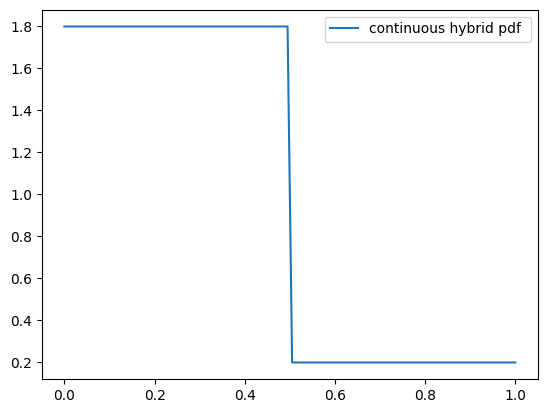

In [246]:
import numpy as np
from scipy.stats import truncnorm,uniform,norm
import matplotlib.pyplot as plt

# Set the mean and standard deviation of the Gaussian distribution

epsilon = 0.1

tho = 0.5
a = 0
b = c - tho
c = 1

x = np.linspace(a, c, 100)

### version continue

# pdf d'une gaussienne tronquee
obj2 = uniform( a , b  )
integrand2 = lambda x: obj2.pdf(x)
result2, error = quad(integrand2, a, b)
print('result2', result2)

# pdf d'une uniforme
obj3 = uniform( b , c )
integrand3 = lambda x: obj3.pdf(x)
result3, error = quad(integrand3, b, c)
print('result3', result3)

pdf = lambda x: (1 - epsilon) * integrand2( x ) / result2 if x<=b else epsilon * integrand3(x) / result3 


result4, error = quad(pdf, a, c)
print('result4',result4)

y = [pdf(i) for i in x]
print(y)
plt.plot(x,y  , label = 'continuous hybrid pdf ')

# plt.axvline(U, color = 'black')


### version discrete:

# rhos = list( np.arange(0, U, U / (K-1) ) )
# print(len(rhos), rhos[-1] ==U )
# p_m_hat =  np.array( [ 1/np.sqrt(2*np.pi )*np.exp( -(rho**2) / (2*sigma**2)  ) for rho in rhos ] )
# rhos.append(U)
# plt.plot( rhos[:-1], p_m_hat, label = 'discretized pdf ')

# p_m1 =  p_m_hat / p_m_hat.sum()
# plt.plot( rhos[:-1], p_m1, 'o-' , label = 'disc. probs (no eps), {}'.format( np.round( sum(p_m1) ),2) )

# p_m = (1 - epsilon) * p_m_hat / p_m_hat.sum()
# p_m = p_m.tolist()
# p_m.append(epsilon)
# plt.plot( rhos, p_m, 'o-' , label = 'disc. probs, {}'.format( np.round(sum(p_m1)) ) )

# plt.ylim(0,0.3)
# plt.xlim(1.5,1.53)
plt.legend()
plt.show()

In [95]:
import numpy as np
from scipy.stats import truncnorm

# Define the parameters of the truncated Gaussian distribution
mu = 0
sigma = 1
U_tho = 2
epsilon = 0.1

# Calculate the lower and upper bounds of the truncated Gaussian distribution
a = 0
b = U - tho
c = U

# Calculate the PDF of the truncated Gaussian distribution
norm_pdf = lambda x: truncnorm.pdf(x, a, b, loc=mu, scale=sigma)

# Calculate the probability mass in the interval [U-tho, U]
pm = epsilon / (truncnorm.cdf(U-tho, a, b, loc=mu, scale=sigma) - truncnorm.cdf(0, a, b, loc=mu, scale=sigma))

# Modify the PDF to include the probability mass epsilon on the interval [U-tho, U]
pdf = lambda x: (1 - pm) * norm_pdf(x) if x < U_tho else pm / (U_tho - U_tho)


In [4]:
def obtain_probability(self,t):

    U = np.sqrt( self.alpha  * np.log(t) ) 
    epsilon = 10e-7
    sigma = 1

    if np.random.uniform([0,1]) < epsilon:
        Z = U
    else:
        obj = truncnorm( a , b , loc=mu, scale=sigma).rvs(a, b, size=1000)
        Z = truncnorm( (0 - loc) / scale , (U - loc) / scale , loc=0, scale=sigma).rvs() 

    return Z

0.009033094936465508

In [63]:
print(rhos)
print(U)

[0.         0.15249954 0.30499908 0.45749862 0.60999816 0.7624977
 0.91499723 1.06749677 1.21999631 1.37249585]
1.5249953914435237
